In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing 
import math
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

In [67]:
# import data
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
for i in df.columns:
    print(i)
    print(df[i].describe())
    print()

age
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

sex
count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

cp
count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

trestbps
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

chol
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

fbs
count    303.000000
mean       

In [77]:
X = df[df.columns[:-1]]
y = df.target

X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


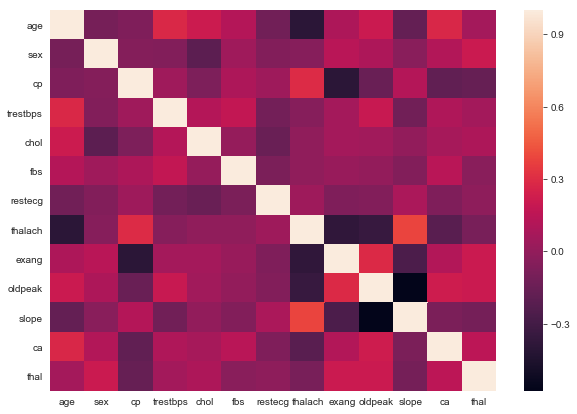

In [78]:
# heatmap with correlation 
corrmat = X.corr()
sns.heatmap(corrmat)

In [91]:
# initialize Logistic Regression
logreg = linear_model.LogisticRegression(C=1e9)

# Fit the model
logreg.fit(X_train, y_train)

# Score with 10=k folds
logreg_score = cross_val_score(logreg, X_test, y_test, cv= 10)
coef = logreg.coef_
intercept = logreg.intercept_
print('All scores:', logreg_score)
print()
print('score:', logreg_score.mean())
print('intercept:', intercept)

# Display feature coefficients
coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Features']
coef_df['Coef'] = coef.reshape(-1,1)
coef_df

All scores: [0.875      0.8125     0.875      0.875      0.8125     0.86666667
 0.6        0.92857143 0.85714286 0.85714286]

score: 0.8359523809523809
intercept: [-0.23401364]


c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local

,Features,Coef
0,age,0.038332
1,sex,-1.371822
2,cp,0.626132
3,trestbps,-0.955957
4,chol,-0.451755
5,fbs,0.207674
6,restecg,0.268327
7,thalach,0.954934
8,exang,-0.723950
9,oldpeak,-1.037219


In [86]:
# initialize ridge
ridge = linear_model.Ridge(alpha=10)

# Fit lasso
ridge.fit(X_train, y_train)

# test and look at scores
ridge_score = cross_val_score(ridge, X_test, y_test, cv=10)

print('All Scores:', ridge_score)
print()
print('score:', ridge_score.mean())
print('intercept:', ridge.intercept_)

coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Features']
coef_df['Coef'] = ridge.coef_
coef_df

All Scores: [ 0.62141916  0.46024519  0.60797437  0.45584088  0.52084596  0.29721551
  0.56343088 -0.17011565  0.40685608  0.47533183]

score: 0.423904421768604
intercept: 0.5150402057374129


,Features,Coef
0,age,-0.014463
1,sex,-0.115586
2,cp,0.053307
3,trestbps,-0.074159
4,chol,-0.020972
5,fbs,0.022836
6,restecg,0.029526
7,thalach,0.051167
8,exang,-0.084457
9,oldpeak,-0.091089


In [87]:
# initialize lasso
lasso = linear_model.Lasso(alpha=.35)

# Fit lasso
lasso.fit(X_train, y_train)

# test and look at scores
lasso_score = cross_val_score(lasso, X_test, y_test, cv=10)
print('All Scores:', lasso_score)
print()
print('score:', lasso_score.mean())
print('intercept:', lasso.intercept_)

coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Features']
coef_df['Coef'] = lasso.coef_
coef_df

All Scores: [-0.09232713 -0.02616782 -0.00391603 -0.04925675 -0.1523878  -0.00391603
 -0.1523878  -0.39864937 -0.92263634 -0.05525924]

score: -0.18569043234212618
intercept: 0.5165562913907285


,Features,Coef
0,age,-0.0
1,sex,-0.0
2,cp,0.0
3,trestbps,-0.0
4,chol,-0.0
5,fbs,-0.0
6,restecg,0.0
7,thalach,0.0
8,exang,-0.0
9,oldpeak,-0.0


In [90]:
for i in range(1,50):
    ridge = linear_model.Ridge(alpha=i)
    lasso = linear_model.Lasso(alpha=i/100)
    
    # train ridge
    ridge.fit(X_train, y_train)
    # test ridge
    ridge_score = cross_val_score(ridge, X_test, y_test, cv=10)
    
    # train lasso
    lasso.fit(X_train, y_train)
    # test lasso
    lasso_score = cross_val_score(lasso, X_test, y_test, cv=10)
    
    
    print('Ridge Score: {} with Lambda: {}'.format(ridge_score.mean(), i))
    print('Lasso Score: {} with Lambda: {}'.format(lasso_score.mean(), i/100))
    print()

Ridge Score: 0.41680789441752236 with Lambda: 1
Lasso Score: 0.42755426500223165 with Lambda: 0.01

Ridge Score: 0.4178172233826697 with Lambda: 2
Lasso Score: 0.4264504306659636 with Lambda: 0.02

Ridge Score: 0.4187641813325116 with Lambda: 3
Lasso Score: 0.4180158765325765 with Lambda: 0.03

Ridge Score: 0.4196521883986176 with Lambda: 4
Lasso Score: 0.40670337240852417 with Lambda: 0.04

Ridge Score: 0.42048440925625064 with Lambda: 5
Lasso Score: 0.3896423787176194 with Lambda: 0.05

Ridge Score: 0.42126377721445357 with Lambda: 6
Lasso Score: 0.3693376963672733 with Lambda: 0.06

Ridge Score: 0.4219930155923139 with Lambda: 7
Lasso Score: 0.34817044176589945 with Lambda: 0.07

Ridge Score: 0.4226746567350029 with Lambda: 8
Lasso Score: 0.32684848317021603 with Lambda: 0.08

Ridge Score: 0.4233110589710347 with Lambda: 9
Lasso Score: 0.30560347676144095 with Lambda: 0.09

Ridge Score: 0.423904421768604 with Lambda: 10
Lasso Score: 0.2843623615537628 with Lambda: 0.1

Ridge Score: 